In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
print("Size of Dataset:", df.shape)
print("Features:\n", list(df.columns))

Size of Dataset: (1023552, 44)
Features:
 ['Unnamed: 0', 'id', 'stmt_date', 'HQ_city', 'legal_struct', 'ateco_sector', 'def_date', 'fs_year', 'asst_intang_fixed', 'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'AR', 'cash_and_equiv', 'asst_tot', 'eqty_tot', 'eqty_corp_family_tot', 'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st', 'debt_fin_lt', 'AP_st', 'AP_lt', 'debt_st', 'debt_lt', 'rev_operating', 'COGS', 'prof_operations', 'goodwill', 'inc_financing', 'exp_financing', 'prof_financing', 'inc_extraord', 'taxes', 'profit', 'days_rec', 'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations']


In [6]:
print('\n Unique default dates: ', df.def_date.unique(), '\n Unique fiscal years: ', df.fs_year.unique(), 
      '\n Unique statement dates: ', df.stmt_date.unique())


 Unique default dates:  ['NaT' '31/10/2008' '28/07/2008' ... '27/07/2013' '01/11/2013'
 '03/01/2013'] 
 Unique fiscal years:  [2011 2008 2009 2012 2007 2010] 
 Unique statement dates:  ['2011-12-31' '2008-12-31' '2009-12-31' '2012-12-31' '2007-12-31'
 '2010-12-31']


## Distribution of null values

In [7]:
df.isnull().sum() * 100 / len(df)

Unnamed: 0                0.000000
id                        0.000000
stmt_date                 0.000000
HQ_city                   0.027063
legal_struct              0.000000
ateco_sector              0.000000
def_date                  0.000000
fs_year                   0.000000
asst_intang_fixed         0.015827
asst_tang_fixed           0.010063
asst_fixed_fin            0.023155
asst_current              0.000098
AR                        0.001172
cash_and_equiv            0.001661
asst_tot                  0.000000
eqty_tot                  0.000098
eqty_corp_family_tot    100.000000
liab_lt                   0.028724
liab_lt_emp               0.015827
debt_bank_st             11.853917
debt_bank_lt              8.887775
debt_fin_st              11.994701
debt_fin_lt               8.994951
AP_st                    11.785918
AP_lt                     9.012146
debt_st                   0.000488
debt_lt                   0.015143
rev_operating             0.017000
COGS                

## Distribution of Legal Structure

<Axes: xlabel='legal_struct'>

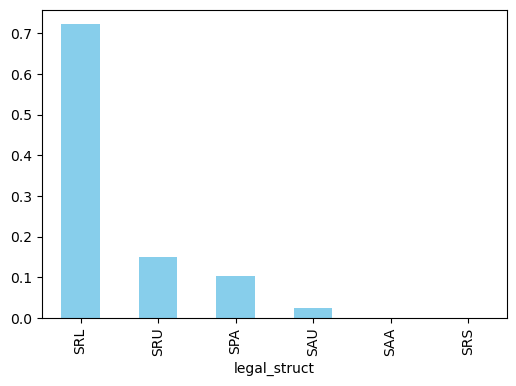

In [8]:
legal_struct_distribution = df['legal_struct'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
legal_struct_distribution.plot(kind='bar', color='skyblue')

## Distribution of Industry Sector

<Axes: xlabel='ateco_sector'>

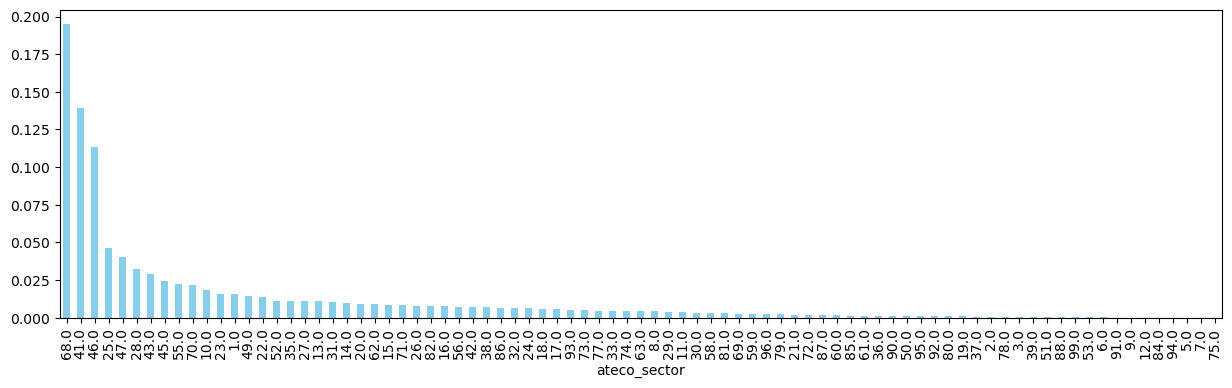

In [9]:
ateco_sector_distribution = df['ateco_sector'].value_counts(normalize=True)
plt.figure(figsize=(15, 4))
ateco_sector_distribution.plot(kind='bar', color='skyblue')

## Percentage of Firms with Taxes Liability

In [10]:
# Calculate average taxes and extraordinary income, then merge them into a single DataFrame
taxes = (
    df.groupby('id')[['taxes', 'inc_extraord']]
    .mean()
    .rename(columns={'taxes': 'avg_taxes', 'inc_extraord': 'avg_ext_inc'})
    .reset_index()
)

# Calculate the percentage of firms with and without tax liability
num_unique_firms = taxes['id'].nunique()
percent_no_tax_liability = (taxes['avg_taxes'] <= 0).mean() * 100
percent_with_tax_liability = (taxes['avg_taxes'] > 0).mean() * 100

# Print the results
print(f'% of unique firms with no tax liability: {percent_no_tax_liability:.2f}')
print(f'% of unique firms with tax liability: {percent_with_tax_liability:.2f}')

% of unique firms with no tax liability: 31.31
% of unique firms with tax liability: 68.69


## Percentage of Default vs. Non-Defaulted firms:


In [11]:
percent_default = np.round(((len(df[df['def_date'] != 'NaT']) / len(df)) * 100),2)

print("% Nondefault:", 100 - percent_default)
print("% Default:",  percent_default)

% Nondefault: 94.59
% Default: 5.41


## Distribution of Defaulted Firms in Each Year

/var/folders/96/qy4rp5xs53jg5bnrc23rsvl40000gn/T/ipykernel_33304/1229468837.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sns.kdeplot(x=pd.to_datetime(defaulted['def_date'], errors='coerce'), data=defaulted)
/Users/catherine/anaconda3/envs/Env1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/catherine/anaconda3/envs/Env1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


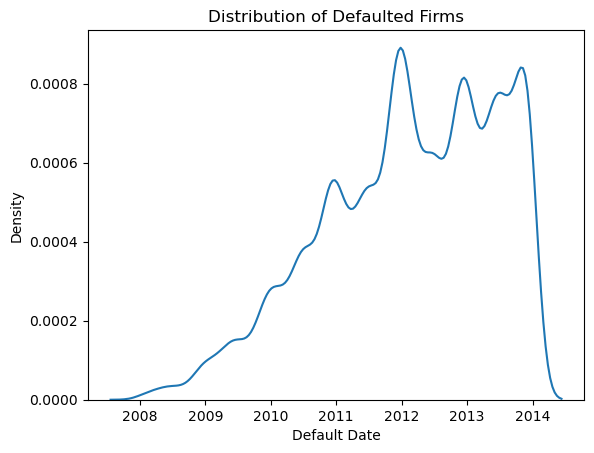

In [12]:
defaulted = df[df['def_date'].notna()]
nondefaulted = df[df['def_date'].isna()]

# Convert 'def_date' to datetime and plot
sns.kdeplot(x=pd.to_datetime(defaulted['def_date'], errors='coerce'), data=defaulted)
plt.title("Distribution of Defaulted Firms")
plt.xlabel("Default Date")
plt.show()

## Fill Missing Values

In [13]:
df['roa'] = df['roa'].fillna(df['profit'] / df['asst_tot'])
df['exp_financing'] = df['exp_financing'].fillna(df['inc_financing'] - df['prof_financing'])
df['eqty_tot'] = df['eqty_tot'].fillna(df['asst_tot'] - (df['liab_lt'] + df['debt_bank_st'] + df['debt_bank_lt'] +
                                        df['debt_fin_st'] + df['debt_fin_lt'] + df['AP_st'] +
                                        df['AP_lt']))


## Feature Selection

Size: total asset 

Leverage: total debt / total asset = (total asset - total equity) / total asset

Profitability: ROA

Liquidity: cash & equivalents / total asset

Debt coverage: operating cash flow / financial expense


In [14]:
df['def_date'] = pd.to_datetime(df['def_date'], dayfirst=True)
df['stmt_date'] = pd.to_datetime(df['stmt_date'])
df['Leverage'] = (df['asst_tot'] - df['eqty_tot']) / df['asst_tot']
df['Liquidity'] = df['cash_and_equiv'] / (df['asst_tot'])
df['Debt_coverage'] = df['cf_operations'] / df['exp_financing']

In [15]:
train = df[['id', 'stmt_date', 'fs_year', 'def_date', 'legal_struct', 'ateco_sector', 
            'HQ_city', 'roa', 'Leverage', 'Debt_coverage', 'Liquidity', 'asst_tot']].copy()

# Rename columns for clarity
train.rename(columns={'roa': 'ROA', 'eqty_tot': 'Total_Asset'}, inplace=True)
train.head()

,id,stmt_date,fs_year,def_date,legal_struct,ateco_sector,HQ_city,ROA,Leverage,Debt_coverage,Liquidity,asst_tot
0,520288,2011-12-31,2011,NaT,SRL,14.0,28.0,-3.81,0.851058,-0.054598,0.001070,1946940.0
1,520288,2008-12-31,2008,NaT,SRL,14.0,28.0,-2.76,1.017968,-0.077998,0.002570,2077346.0
2,520288,2009-12-31,2009,NaT,SRL,14.0,28.0,-2.17,1.022845,0.925622,0.005310,1975874.0
3,520288,2012-12-31,2012,NaT,SRL,14.0,28.0,-12.99,0.979073,-12.015864,0.003496,1872882.0
4,520288,2007-12-31,2007,NaT,SRL,14.0,28.0,6.20,0.960398,5.898666,0.008071,1769122.0


## Correlation Between Features

In [16]:
train.iloc[: , -5:].describe()[1:].corr()


/Users/catherine/anaconda3/envs/Env1/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,ROA,Leverage,Debt_coverage,Liquidity,asst_tot
ROA,1.000000,0.751749,0.954915,0.999054,0.744949
Leverage,0.751749,1.000000,0.863816,0.733694,0.999921
Debt_coverage,0.954915,0.863816,1.000000,0.999956,0.995023
Liquidity,0.999054,0.733694,0.999956,1.000000,0.726833
asst_tot,0.744949,0.999921,0.995023,0.726833,1.000000


## Check Multicollinearity: 

	VIF = 1: No multicollinearity (the variable is not correlated with other predictors).

	VIF between 1 and 5: Low to moderate multicollinearity (acceptable in most cases).

	VIF above 5: Moderate to high multicollinearity (might need closer examination, especially in sensitive models).

	VIF above 10: High multicollinearity (often considered problematic and typically indicates that you should consider removing or transforming the variable).

In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming `train` is your DataFrame containing the columns you want to check for multicollinearity
# Select only the numerical features for VIF calculation
features = train[['ROA', 'Leverage', 'Debt_coverage', 'Liquidity', 'asst_tot']]
features_cleaned = features.replace([np.inf, -np.inf], np.nan).dropna()

# Add a constant to the model for VIF calculation
X = add_constant(features_cleaned)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data
print(vif_data)

         Feature       VIF
0          const  6.807850
1            ROA  1.069243
2       Leverage  1.044373
3  Debt_coverage  1.000584
4      Liquidity  1.047004
5       asst_tot  1.000183


#### Fiscal Years:

In [18]:
train['default_year'] = [date.year for date in pd.to_datetime(train['def_date'], format = "%d/%m/%Y")]
train['target'] = np.logical_and(train.default_year.notna(), train['fs_year'] + 1 >= train.default_year).astype(int)
train

,id,stmt_date,fs_year,def_date,legal_struct,ateco_sector,HQ_city,ROA,Leverage,Debt_coverage,Liquidity,asst_tot,default_year,target
0,520288,2011-12-31,2011,NaT,SRL,14.0,28.0,-3.81,0.851058,-0.054598,0.001070,1946940.0,NaN,0
1,520288,2008-12-31,2008,NaT,SRL,14.0,28.0,-2.76,1.017968,-0.077998,0.002570,2077346.0,NaN,0
2,520288,2009-12-31,2009,NaT,SRL,14.0,28.0,-2.17,1.022845,0.925622,0.005310,1975874.0,NaN,0
3,520288,2012-12-31,2012,NaT,SRL,14.0,28.0,-12.99,0.979073,-12.015864,0.003496,1872882.0,NaN,0
4,520288,2007-12-31,2007,NaT,SRL,14.0,28.0,6.20,0.960398,5.898666,0.008071,1769122.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023547,92001230520,2011-12-31,2011,NaT,SPA,93.0,52.0,2.16,0.918389,6.999581,0.000081,7648851.0,NaN,0
1023548,92001230520,2008-12-31,2008,NaT,SPA,93.0,52.0,12.97,0.897331,4.469833,0.000023,6223862.0,NaN,0
1023549,92001230520,2007-12-31,2007,NaT,SPA,93.0,52.0,6.15,0.897084,8.157203,0.005630,6146110.0,NaN,0
1023550,94111750108,2010-12-31,2010,NaT,SRL,68.0,10.0,-0.31,0.832813,-inf,0.019239,1547771.0,NaN,0


In [19]:
train.target.value_counts()

target
0    1012008
1      11544
Name: count, dtype: int64

## A Logit Model With Features

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it includes 'target' as the dependent variable
# Replace infinite values and drop rows with NaNs for training
train = train.replace([np.inf, -np.inf], np.nan).dropna()

# Define X and y
X = train[['ROA', 'Leverage', 'Debt_coverage', 'Liquidity', 'asst_tot']]
y = train['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7392


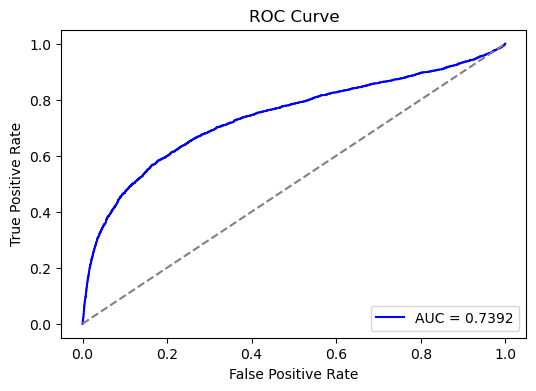

In [26]:
# Plotting the AUC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()